[Kelly's Criterion](https://en.wikipedia.org/wiki/Kelly_criterion) (or Kelly strategy or Kelly bet), also known as the scientific gambling method, is a formula for optimum bet sizing. Take away: you go bust if you over allocate even if you have the funds and the odds.

Copying Taleb's [example](https://twitter.com/nntaleb/status/1228430229871452160?s=20). 

$V(N)$ is your capital at time N. 

In Kelly's original paper then the growth rate, r, is defined in terms of continuous exponential growth: $V(N)=V(0)e^{Nr}$ so $r=\frac{1}{N}ln(\frac{V(N)}{V(0)})$

Then introduce the concept of winning or losing randomly where $W$ is the number of wins and $L$ the number of losses, then $V(N)=V(0)(1-l)^{L}(1+l)^{W}$, defining $l$ as the *leverage*.

So $r=\frac{1}{N}ln((1-l)^{L}(1+l)^{W})$

Identifying the probability of losing $p \approx L/N$ and the probability of winning $1-p \approx W/N$ then 
$r=pln(1-l) + (1-p)ln(1+l)$

Taleb choses the equivalent discrete definition of $V(N)=V(0)(1+r)^{N}$ so $1+r=(\frac{V(N)}{V(0)})^\frac{1}{N}$. 

So in this case $1+r=(1-l)^{\frac{L}{N}}(1+l)^{\frac{W}{N}}$.

(Side note: take the logarithm of both sides to get $ln(1+r)=pln(1-l) + (1-p)ln(1+l)$ we recover the Shannon entropy.)

In [1]:
r(p,l) = ((1-l)^p * (1+l)^(1-p)) - 1

r (generic function with 1 method)

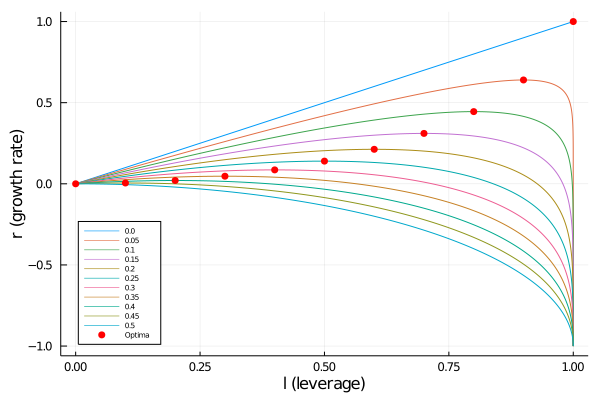

In [2]:
using Plots
plot(leg=:bottomleft, legendfontsize=5, xlabel="l (leverage)", ylabel="r (growth rate)")
for p in 0:0.05:0.5
    plot!(0:0.0001:1, x->r(p,x), label=p)
end
optima = [(1-2p,r(p,1-2p)) for p in 1e-15:0.05:0.51]
scatter!(optima, shape=:circle, ms=4, mc=:red, msw=0, label="Optima")

TODO: Extend with examples from this article: https://www.rdocumentation.org/packages/evmix/versions/2.12/topics/hillplot